<a href="https://colab.research.google.com/github/Herdvair/Employee-Satisfaction/blob/main/Employee_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# People Analitycs : Analisis Kepuasan Kerja Karyawan

**Objective Analysis:**

Perusahaan ingin memahami tingkat kepuasan kerja karyawan sebagai upaya menciptakan lingkungan kerja yang sehat dan produktif. Untuk itu, tim SDM ditugaskan untuk menganalisis data survei karyawan guna mengidentifikasi faktor-faktor utama yang memengaruhi kepuasan kerja. Hasil analisis ini akan digunakan sebagai acuan dalam merumuskan strategi terhadap peningkatan kesejahteraan dan produktivitas karyawan melalui visualisasi data yang informatif dan rekomendasi berbasis data.

## Data Preparation

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df_employee = pd.read_csv('/content/assignment_employee_survey.csv')
df_employee.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.50,2,1,7.60,Car,20,3,12,0,Bachelor,True,33.50,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.80,2,2,7.90,Car,15,4,11,0,Bachelor,False,36.00,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.10,5,4,6.50,Motorbike,17,0,30,0,Bachelor,True,10.50,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.90,3,1,7.50,Public Transport,13,2,9,0,Bachelor,True,23.00,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,1.40,4,2,6.20,Car,8,3,13,0,Bachelor,False,35.00,5


**Deskripsi Data:**

emp_id : Nomor identitas unik setiap karyawan

gender : Jenis kelamin karyawan

age : Usia karyawan dalam satuan tahun

marital status : Status pernikahan karyawan

job level : Tingkatan posisi atau jabatan karyawan di perusahaan

experience : Lama pengalaman kerja yang dimiliki karyawan

dept : Departemen atau unit kerja tempat karyawan ditempatkan

emp type : Jenis status kepegawaian

wlb : Tingkat keseimbangan antara pekerjaan dan kehidupan pribadi yang dirasakan karyawan

work env : Persepsi karyawan terhadap kualitas lingkungan kerja sehari-hari

physical activity hours :  Waktu yang dihabiskan untuk aktivitas fisik per hari

workload : Tingkat beban kerja yang dihadapi karyawan

stress : Tingkat stres yang dialami dalam pekerjaan

sleep hours : Jam tidur per hari

commute mode : Jenis transportasi yang digunakan saat berangkat kerja

commute distance : Jarak perjalanan dari rumah ke kantor

num companies : Jumlah perusahaan tempat karyawan pernah bekerja sebelumnya

team size : Jumlah anggota dalam tim kerja

num reports : Jumlah laporan atau tanggung jawab pelaporan yang dimiliki

edu level : Tingkat pendidikan terakhir yang ditempuh karyawan

have ot : Status apakah karyawan sering lembur atau tidak

training hours per year :Total jam pelatihan yang diikuti dalam satu tahun

job satisfaction : Skor tingkat kepuasan kerja karyawan secara keseluruhan

## Data Understanding & Feature Engineering

In [ ]:
def data_understanding(df_employee : object, head:int = 10) -> object:
    print('\n ===== Shape =====')
    print(df_employee.shape)

    print('\n ===== Columns =====')
    print(df_employee.columns)

    print('\n ===== Info =====')
    df_employee.info()

    print('\n ===== Describe =====')
    print(df_employee.describe())

    print('\n ===== Missing Value =====')
    print(df_employee.isna().sum())

data_understanding(df_employee)


 ===== Shape =====
(2766, 23)

 ===== Columns =====
Index(['emp_id', 'gender', 'age', 'marital_status', 'job_level', 'experience',
       'dept', 'emp_type', 'wlb', 'work_env', 'physical_activity_hours',
       'workload', 'stress', 'sleep_hours', 'commute_mode', 'commute_distance',
       'num_companies', 'team_size', 'num_reports', 'edu_level', 'have_ot',
       'training_hours_per_year', 'job_satisfaction'],
      dtype='object')

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6  

In [ ]:
df_employee['emp_id'] = df_employee['emp_id'].astype(str)

**CEK DATA DUPLIKAT**

In [ ]:
len(df_employee.drop_duplicates())/len(df_employee)

1.0

note : Tidak ada data duplikat

**CEK DATA TIDAK KONSISTEN**

In [ ]:
for i in df_employee.columns:
  print("========columns=========")
  display(df_employee[i].value_counts())
  print("\n")

========columns=========


,count
emp_id,
2183,1
6,1
11,1
33,1
20,1
...,...
323,1
218,1
185,1




========columns=========


,count
gender,
Male,1526
Female,1240




========columns=========


,count
age,
23,151
24,145
22,143
36,111
28,104
31,104
37,104
29,101
25,101




========columns=========


,count
marital_status,
Married,1397
Single,1180
Divorced,189




========columns=========


,count
job_level,
Senior,979
Mid,696
Junior,557
Lead,350
Intern/Fresher,184




========columns=========


,count
experience,
2,235
1,222
3,176
6,157
4,156
5,143
0,143
7,142
8,128




========columns=========


,count
dept,
IT,723
Finance,565
Operations,410
Marketing,292
Sales,260
Legal,249
Customer Service,137
HR,130




========columns=========


,count
emp_type,
Full-Time,1897
Part-Time,579
Contract,290




========columns=========


,count
wlb,
5,607
1,575
4,575
3,507
2,502




========columns=========


,count
work_env,
5,589
3,571
2,554
1,532
4,520




========columns=========


,count
physical_activity_hours,
2.00,117
2.80,116
2.20,113
2.50,113
1.80,109
2.10,106
2.40,102
1.70,99
1.50,98




========columns=========


,count
workload,
4,574
2,560
1,559
3,550
5,523




========columns=========


,count
stress,
1,1656
2,483
3,395
4,162
5,70




========columns=========


,count
sleep_hours,
6.70,115
6.80,113
7.00,113
7.10,112
6.90,104
7.20,102
7.30,99
6.20,98
6.30,97




========columns=========


,count
commute_mode,
Car,998
Public Transport,804
Bike,400
Motorbike,289
Walk,275




========columns=========


,count
commute_distance,
2,179
1,172
10,147
8,131
9,122
5,119
7,115
6,111
13,95




========columns=========


,count
num_companies,
0,439
2,304
4,298
3,295
1,291
5,271
6,172
10,159
8,146




========columns=========


,count
team_size,
15,216
10,203
21,150
22,146
20,141
23,136
25,131
13,130
24,119




========columns=========


,count
num_reports,
0,1437
4,168
1,160
7,156
6,149
2,146
3,145
9,145
8,139




========columns=========


,count
edu_level,
Bachelor,2107
Master,346
High School,227
PhD,86




========columns=========


,count
have_ot,
False,1900
True,866




========columns=========


,count
training_hours_per_year,
21.00,110
10.00,96
10.50,88
21.50,86
20.50,79
...,...
63.00,10
63.50,9
57.00,8




========columns=========


,count
job_satisfaction,
4,1127
3,519
5,478
1,388
2,254


note : Tidak ada data tidak konsisten

In [ ]:
features = ['age', 'experience','wlb','work_env','physical_activity_hours','workload','stress','sleep_hours','commute_distance',
            'num_companies','team_size','num_reports','training_hours_per_year','job_satisfaction']

def check_plot(df_employee,features):

    for i in features:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_employee[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_employee[i])
        plt.title('Boxplot')

        plt.show()

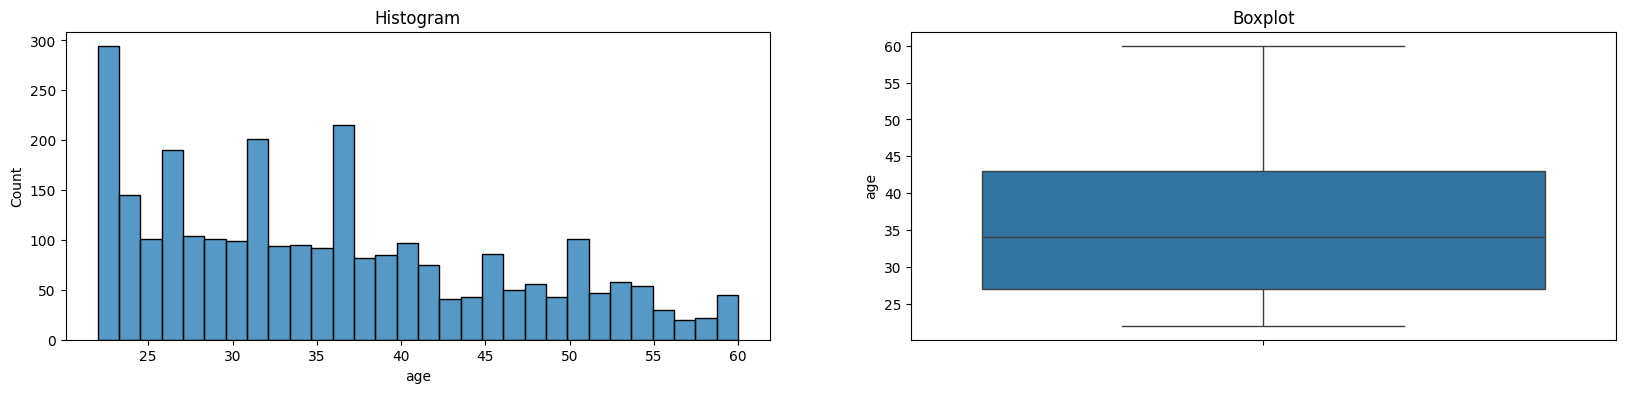

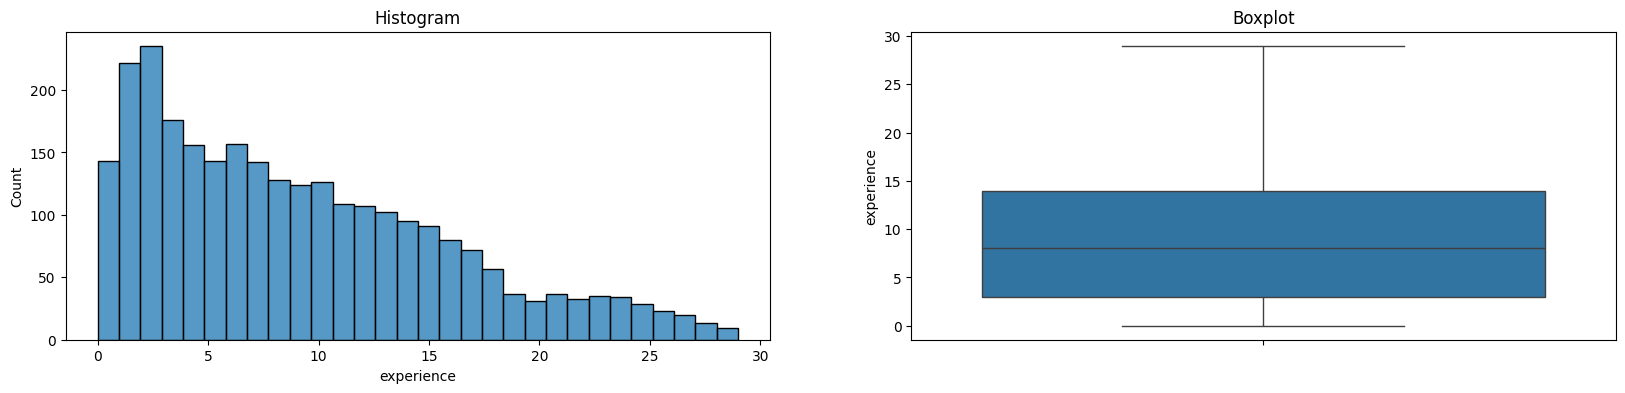

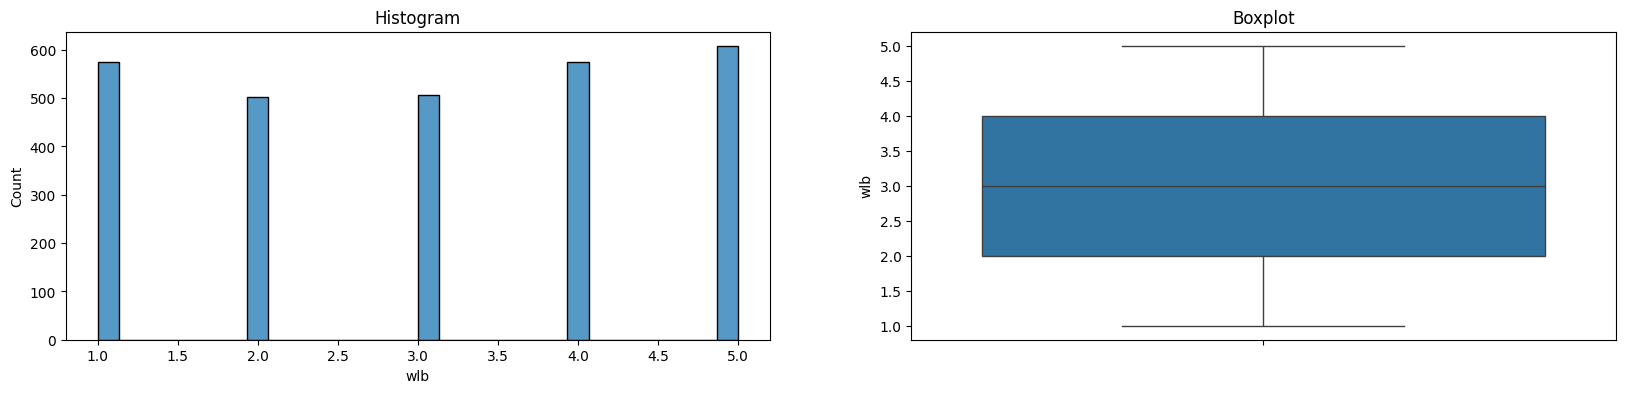

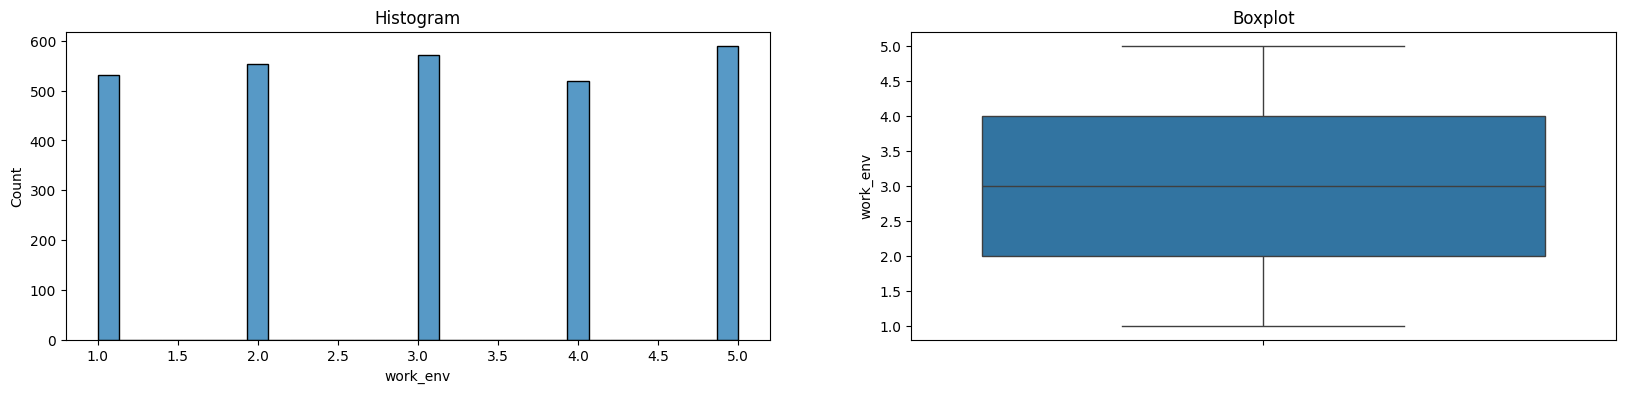

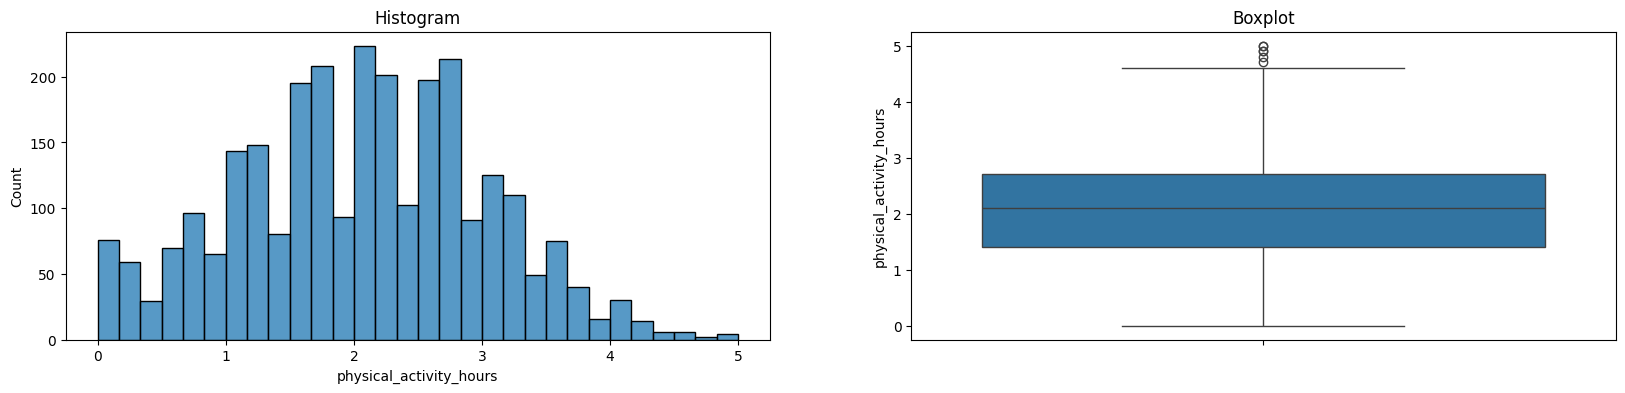

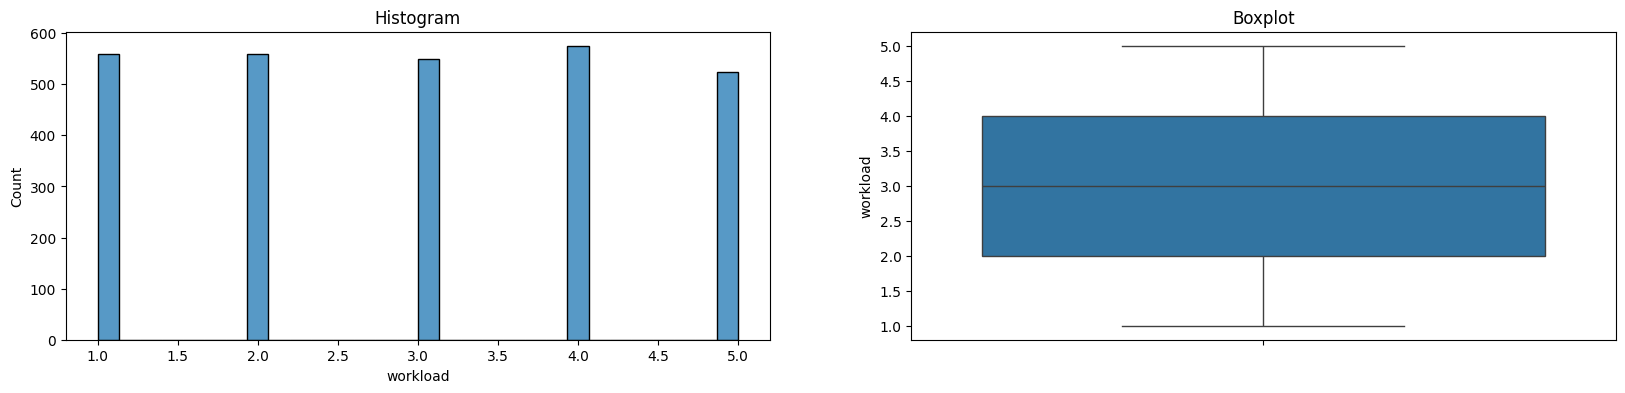

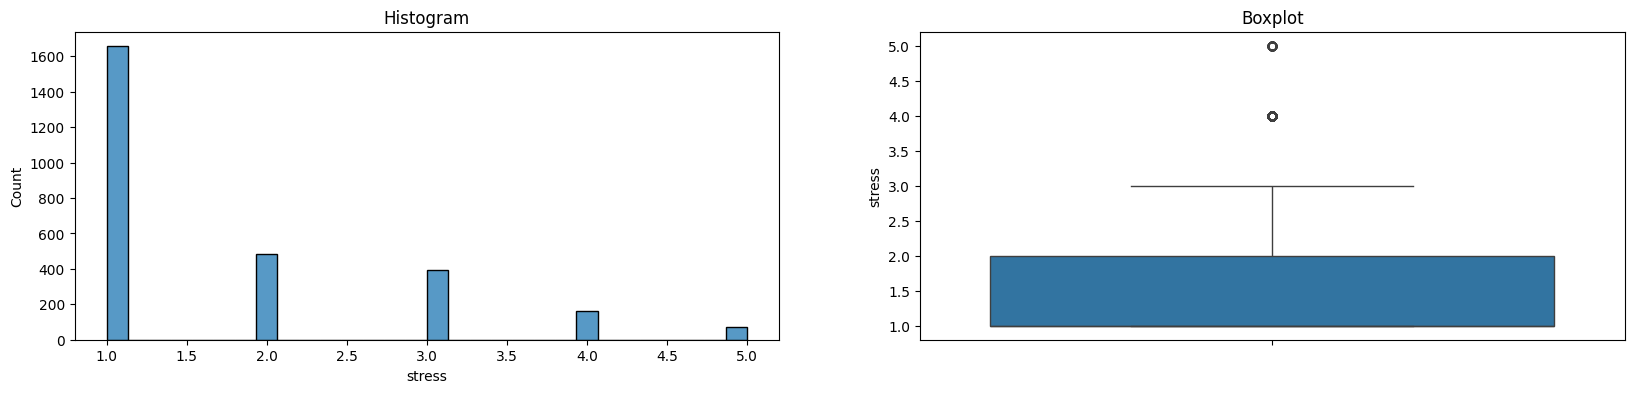

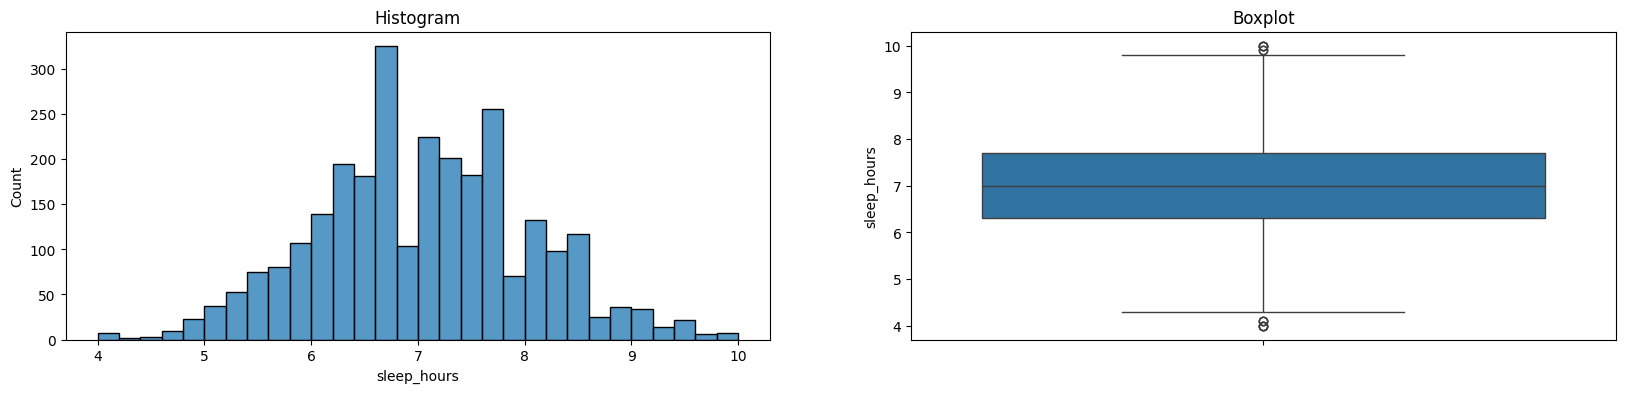

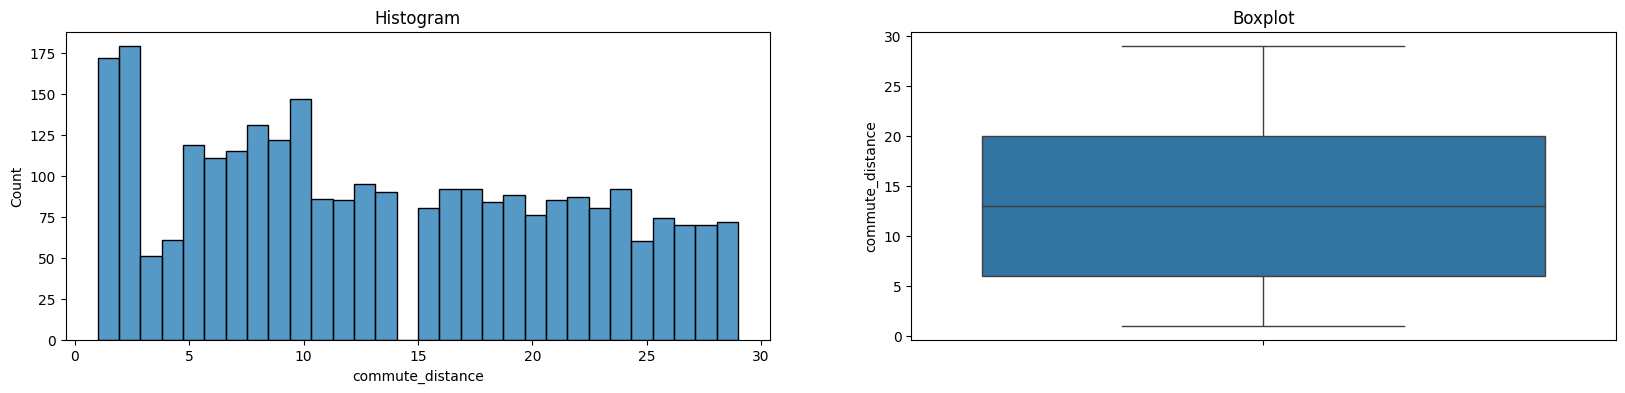

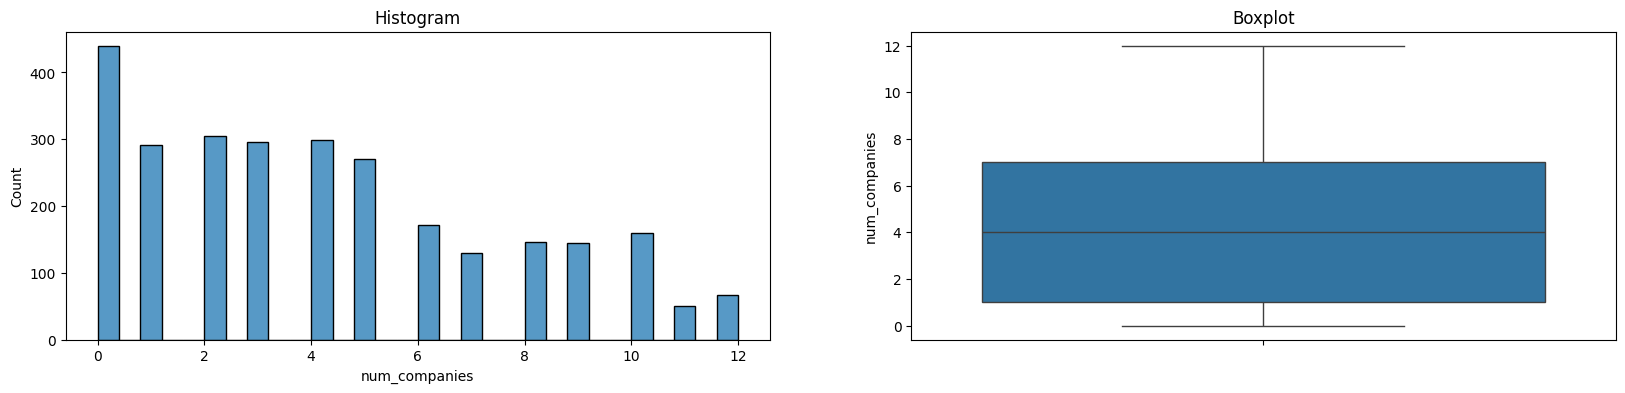

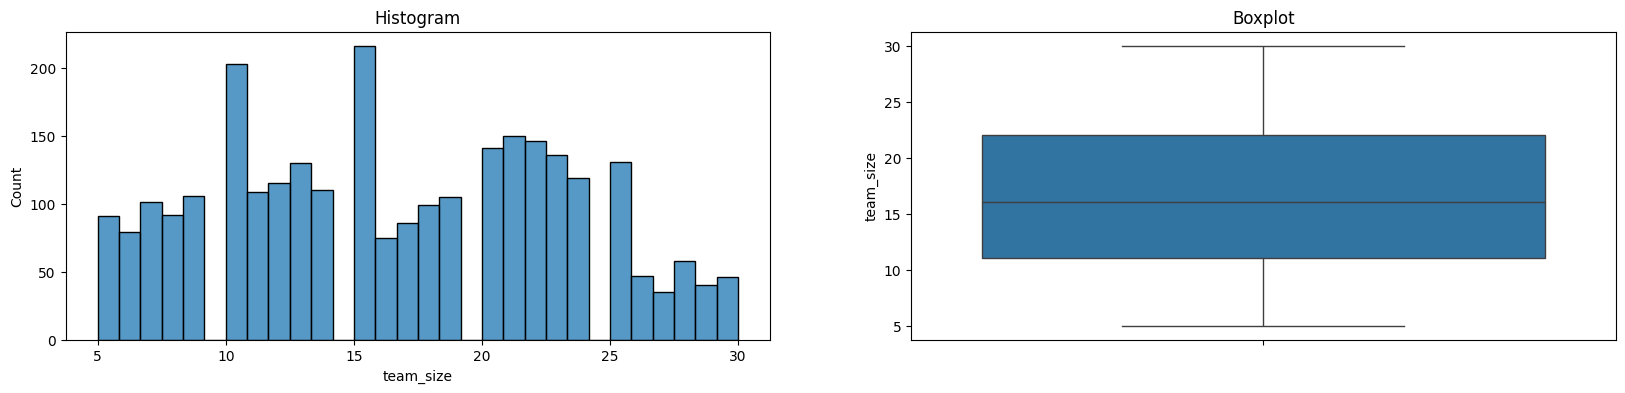

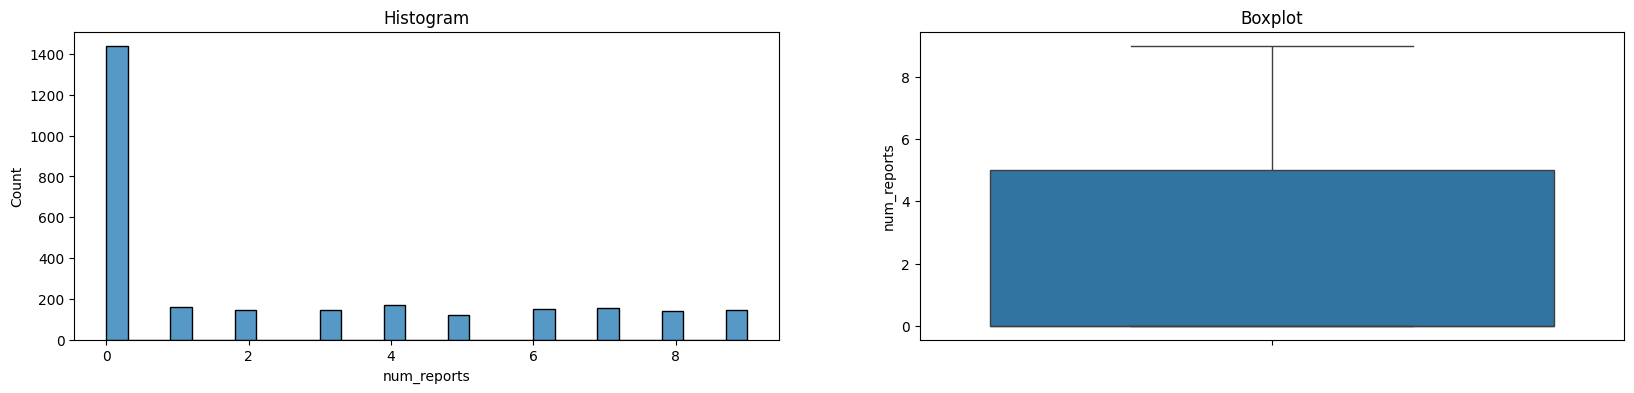

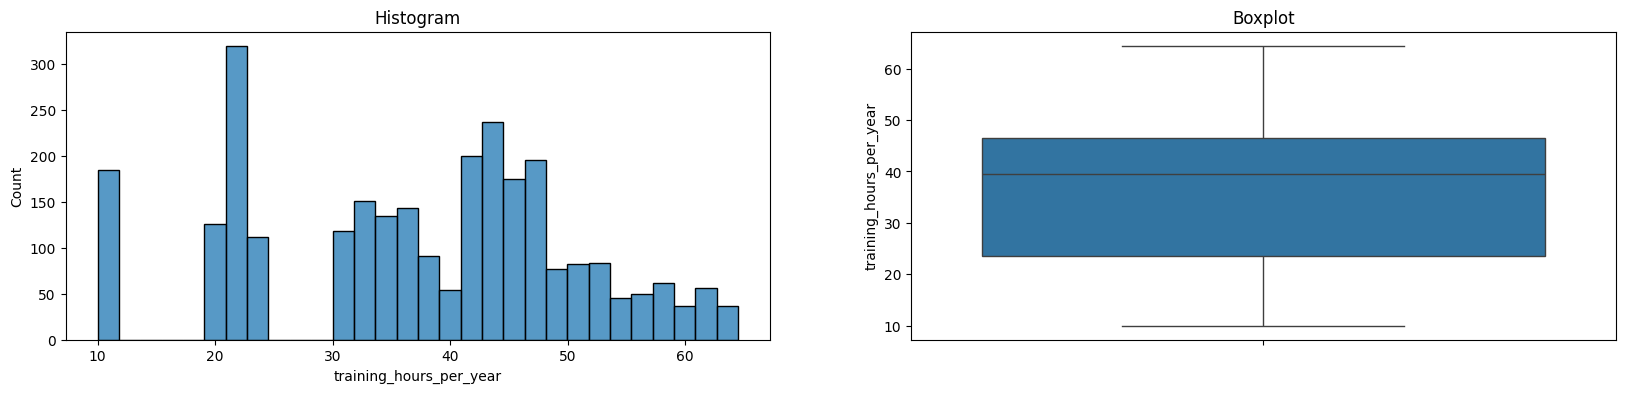

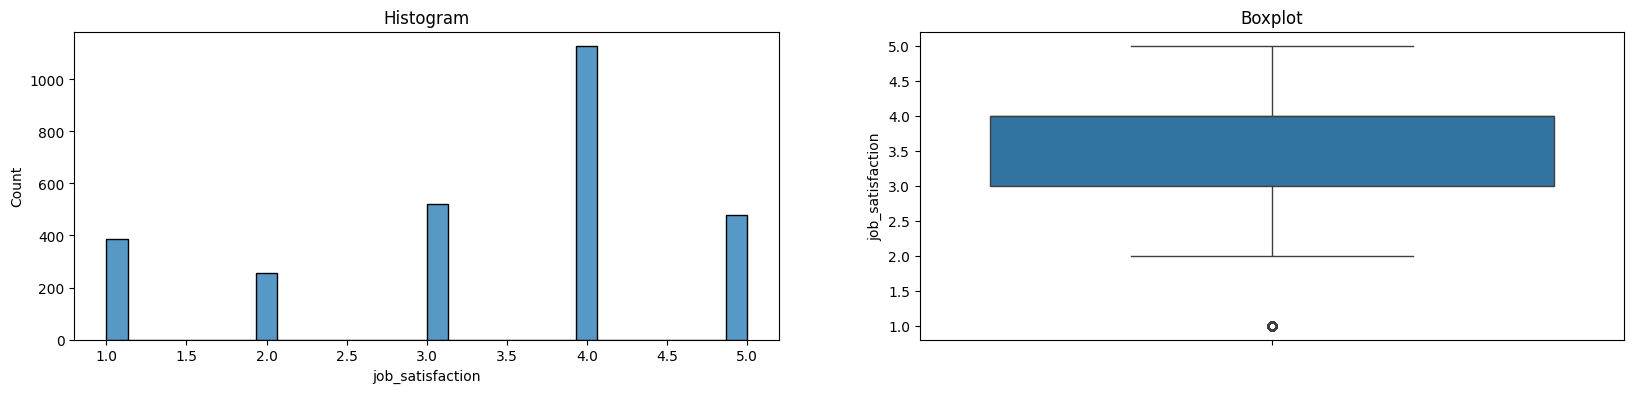

In [ ]:
check_plot(df_employee,features)

Note : Tidak perlu handling outlier, karena distribusi datanya masih wajar.

## EDA (Exploratory Data Analysis)

### Job Satisfaction Rate

In [ ]:
df_employee.value_counts('job_satisfaction')

,count
job_satisfaction,
4,1127
3,519
5,478
1,388
2,254


In [ ]:
#dapatkan proporsi job satisfaction
df_employee.value_counts('job_satisfaction', normalize = True)

,proportion
job_satisfaction,
4,0.41
3,0.19
5,0.17
1,0.14
2,0.09


Insight :

Berdasarkan proporsi skor job satisfaction, sebagian besar karyawan (41%) memberikan skor 4, yang menunjukkan bahwa mereka merasa puas dengan pekerjaannya. Skor ini menjadi yang paling dominan dibandingkan kategori lainnya. Sementara itu, skor kepuasan kerja yang rendah yaitu skor 1 (14%) dan skor 2 (9%) hanya dimiliki oleh sebagian kecil karyawan. Artinya bahwa tingkat ketidakpuasan karyawan relatif rendah di perusahaan ini.

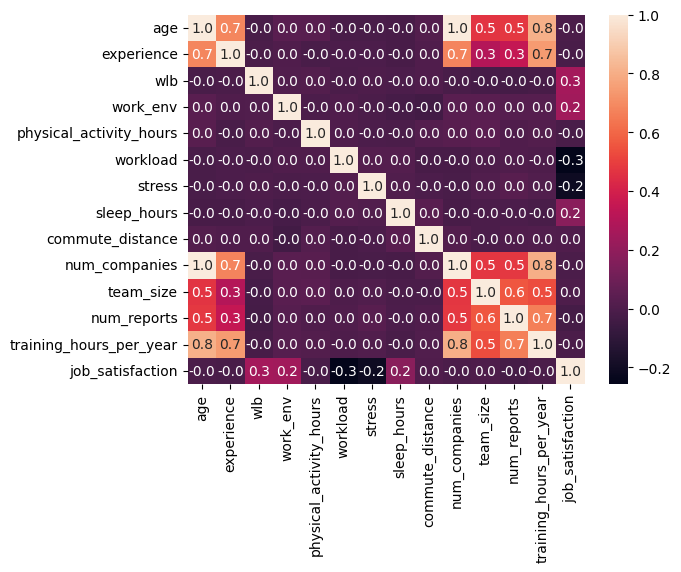

In [ ]:
df_numeric = df_employee.select_dtypes(include=['number'])

sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f")
plt.show()

Insight :  
Berdasarkan visualisasi korelasi menggunakan heatmap.

- Work-life balance (wlb) memiliki korelasi positif sedang (0.3) dengan job satisfaction, menunjukkan bahwa semakin baik keseimbangan kehidupan kerja, semakin tinggi kepuasan kerja karyawan.

- Work environment menunjukkan korelasi positif lemah (0.2), yang berarti kualitas lingkungan kerja cenderung berkontribusi pada kepuasan kerja, meskipun tidak dominan.

- Workload memiliki korelasi negatif sedang (-0.3) terhadap job satisfaction, mengindikasikan bahwa semakin tinggi beban kerja, maka tingkat kepuasan kerja cenderung menurun.

- Stress juga menunjukkan korelasi negatif lemah (-0.2), yang mengisyaratkan bahwa tekanan kerja dapat berdampak buruk pada kepuasan kerja, meskipun tidak secara signifikan.

- Sleep hours menunjukkan korelasi positif lemah (0.2), yang menunjukkan bahwa kualitas atau kuantitas tidur dapat sedikit berpengaruh terhadap kepuasan kerja.

#### wlb (Work Life Balance)

Apakah karyawan dengan work-life balance yang lebih baik memiliki tingkat kepuasan kerja yang lebih tinggi?

In [ ]:
wlb_avg = df_employee.groupby('wlb')['job_satisfaction'].mean()
wlb_avg

,job_satisfaction
wlb,
1,2.91
2,3.13
3,3.40
4,3.62
5,3.79


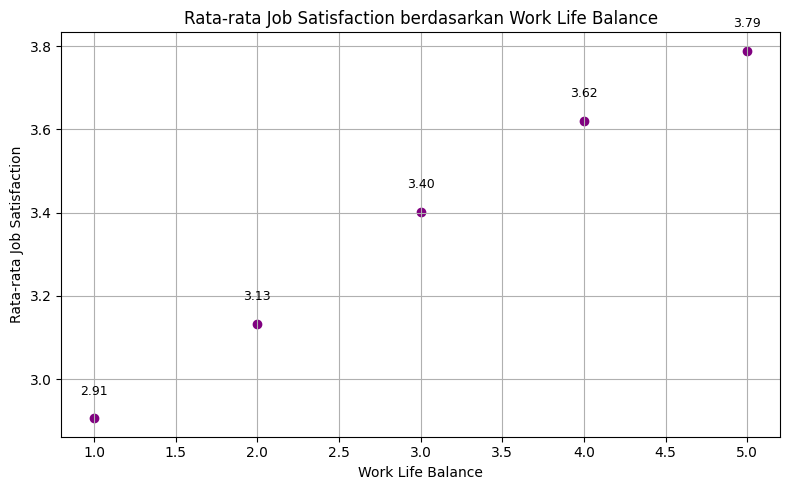

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(wlb_avg.index, wlb_avg.values, color='purple')

for x, y in zip(wlb_avg.index, wlb_avg.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Rata-rata Job Satisfaction berdasarkan Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Rata-rata Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight :  
Visualisasi menunjukkan adanya korelasi positif antara skor Work Life Balance (WLB) dan rata-rata Job Satisfaction. Semakin tinggi skor WLB, semakin tinggi pula tingkat kepuasan kerja karyawan.

- Karyawan dengan skor WLB 5 memiliki rata-rata job satisfaction tertinggi yaitu 3.79, menunjukkan bahwa keseimbangan kehidupan kerja yang baik berkorelasi dengan tingkat kepuasan yang tinggi.

- Sebaliknya, karyawan dengan skor WLB 1 memiliki rata-rata job satisfaction paling rendah yaitu 2.91, yang menunjukkan ketidaknyamanan dalam bekerja akibat rendahnya keseimbangan antara pekerjaan dan kehidupan pribadi.

Hal ini menunjukkan bahwa work life balance merupakan salah satu faktor penting yang dapat memengaruhi kepuasan kerja karyawan secara umum.

#### workload (Beban Kerja)

Apakah beban kerja cendurung merata di seluruh departement?

In [ ]:
dist_wl = df_employee.groupby('dept')['workload'].mean()
dist_wl

,workload
dept,
Customer Service,2.88
Finance,3.00
HR,2.81
IT,2.99
Legal,3.02
Marketing,3.12
Operations,2.94
Sales,2.91


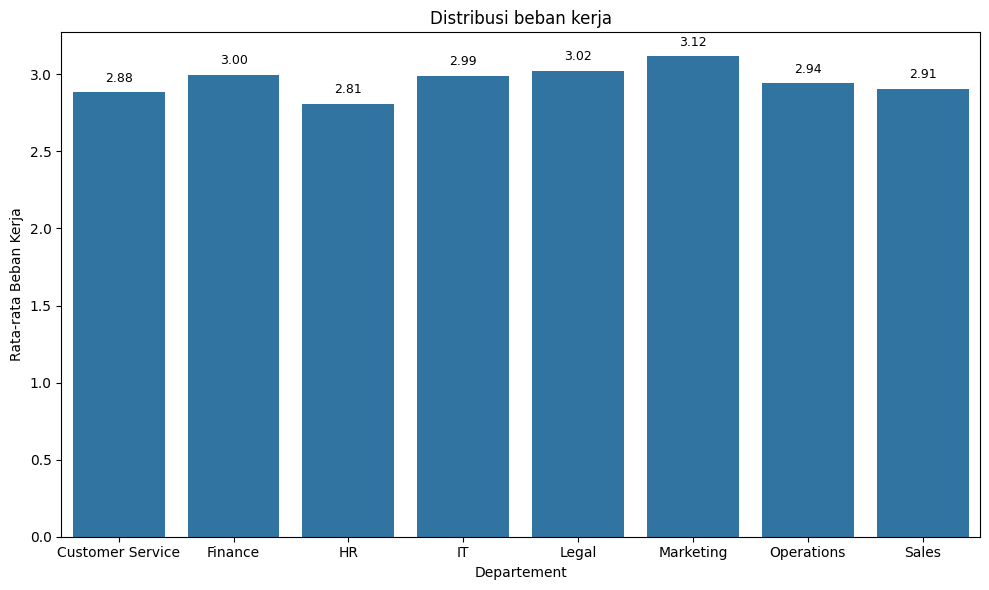

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dist_wl.reset_index(), x='dept', y='workload')

for x, y in zip(dist_wl.index, dist_wl.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Distribusi beban kerja')
plt.xlabel('Departement')
plt.ylabel('Rata-rata Beban Kerja')
plt.tight_layout()
plt.show()

Insight :

Berdasarkan visualisasi distribusi rata-rata beban kerja per departemen, terlihat bahwa beban kerja antar departemen relatif merata, dengan nilai berada pada kisaran 2.81 hingga 3.12.

- Departemen Marketing memiliki rata-rata beban kerja tertinggi (3.12), yang mengindikasikan bahwa tim ini menangani tanggung jawab yang besar dan peran yang strategis bagi perusahaan. Oleh karena itu, penting bagi manajemen untuk memastikan bahwa beban tersebut tidak berdampak negatif terhadap kesejahteraan dan produktivitas karyawan, termasuk menjaga keseimbangan antara pekerjaan dan kehidupan pribadi.

- Sebaliknya, departemen HR memiliki beban kerja rata-rata terendah (2.81), meskipun tetap berada dalam kisaran yang relatif dekat dengan departemen lainnya.

Secara keseluruhan, tidak ada perbedaan ekstrem, tetapi tetap perlu dilakukan pemantauan berkala untuk mengantisipasi potensi kelelahan atau ketimpangan beban kerja antar tim.

#### stress

Seberapa besar pengaruh stress terhadap kepuasan kerja karyawan?

In [ ]:
stress = df_employee.groupby('stress')['job_satisfaction'].mean()
stress

,job_satisfaction
stress,
1,3.56
2,3.38
3,3.01
4,2.82
5,2.56


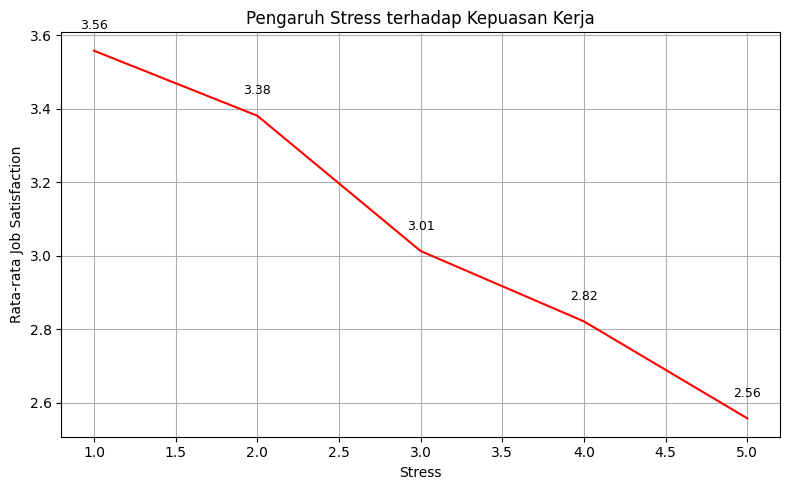

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = stress.index, y = stress.values, color='red')

for x, y in zip(stress.index, stress.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Pengaruh Stress terhadap Kepuasan Kerja')
plt.xlabel('Stress')
plt.ylabel('Rata-rata Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight :

Berdasarkan visualisasi di atas, terdapat hubungan negatif yang jelas antara tingkat stres dan rata-rata kepuasan kerja karyawan:

- Ketika tingkat stres rendah (skor 1), rata-rata kepuasan kerja tertinggi, yaitu 3.56. Namun, semakin tinggi skor stres, kepuasan kerja menurun secara konsisten:

- Ketika tingkat stress merujuk pada (skor 2) menunjukkan bahwa skor kepuasan kerja turun ke 3.38

- Ketika tingkat stress merujuk pada (skor 3) turun signifikan ke 3.01

- Selanjutnya skor stres 4 dan 5 kembali menurun lagi menjadi 2.82 hingga 2.56

Artinya, tingkat stres yang tinggi secara langsung menurunkan kepuasan kerja. Hal ini menunjukkan pentingnya manajemen stres di tempat kerja, seperti:

1. Meningkatkan dukungan psikologis atau konseling,

2. Mengelola beban kerja secara adil,

3. Memberi waktu istirahat dan cuti yang cukup.

#### job level

Apakah semakin tinggi job level cenderung memiliki tingkat kepuasan kerja yang lebih tinggi?

In [ ]:
job_level = df_employee.groupby('job_level')['job_satisfaction'].mean()
job_level

,job_satisfaction
job_level,
Intern/Fresher,3.36
Junior,3.37
Lead,3.31
Mid,3.41
Senior,3.39


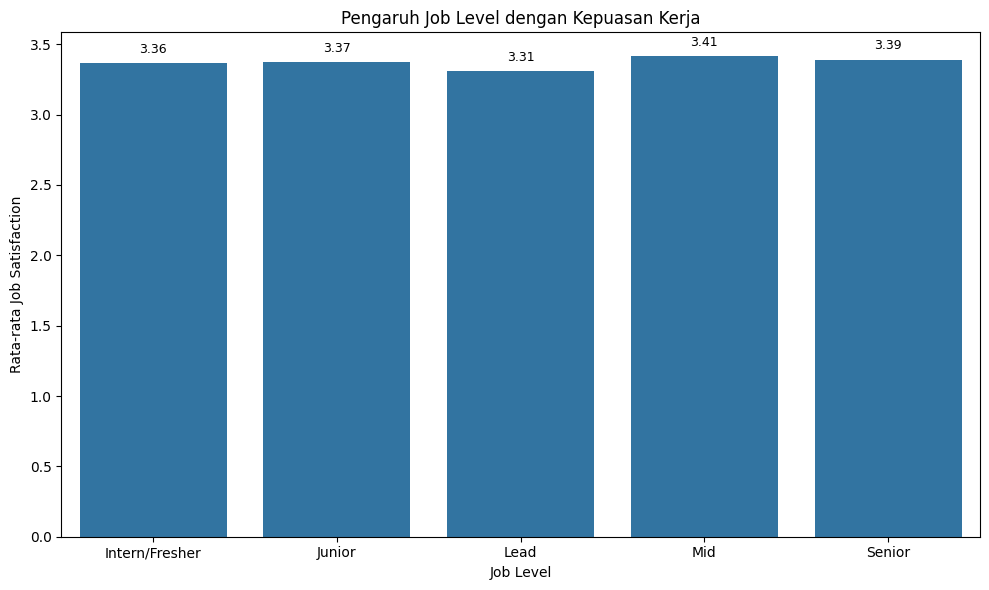

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=job_level.reset_index(), x='job_level', y='job_satisfaction')

for x, y in zip(job_level.index, job_level.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Pengaruh Job Level dengan Kepuasan Kerja')
plt.xlabel('Job Level')
plt.ylabel('Rata-rata Job Satisfaction')
plt.tight_layout()
plt.show()

Insight :

Berdasarkan visualisasi di atas, tingkat kepuasan kerja karyawan relatif stabil di seluruh jenjang jabatan, dengan rata-rata berada di kisaran 3.31 hingga 3.41.

- Level “Mid” memiliki rata-rata kepuasan kerja tertinggi yaitu 3.41, diikuti oleh Senior (3.39) dan Junior (3.37).

- Sementara itu, level “Lead” memiliki rata-rata terendah yaitu 3.31, meskipun perbedaannya tidak terlalu signifikan.

Kemungkinan besar level Lead memiliki beban tanggung jawab yang lebih berat karena harus mengoordinasikan tim dan proyek, yang dapat memengaruhi tingkat kepuasan kerja. Sementara itu, level Mid cenderung berada pada posisi yang cukup stabil secara peran dan ekspektasi, sehingga memberikan pengalaman kerja yang lebih memuaskan. Oleh karena itu, perlu dilakukan evaluasi terhadap beban dan dukungan kerja untuk posisi Lead, agar mereka tetap termotivasi dan tidak mengalami burnout.

### Segmentasi Karyawan berdasarkan Departement

In [ ]:
segmen_karyawa_overall = df_employee['job_satisfaction'].mean()
segmen_karyawa_overall

np.float64(3.380694143167028)

In [ ]:
segmen_karyawan = df_employee.groupby('dept')['job_satisfaction'].mean()

In [ ]:
segmen_karyawan

,job_satisfaction
dept,
Customer Service,3.34
Finance,3.42
HR,3.40
IT,3.29
Legal,3.38
Marketing,3.34
Operations,3.46
Sales,3.48


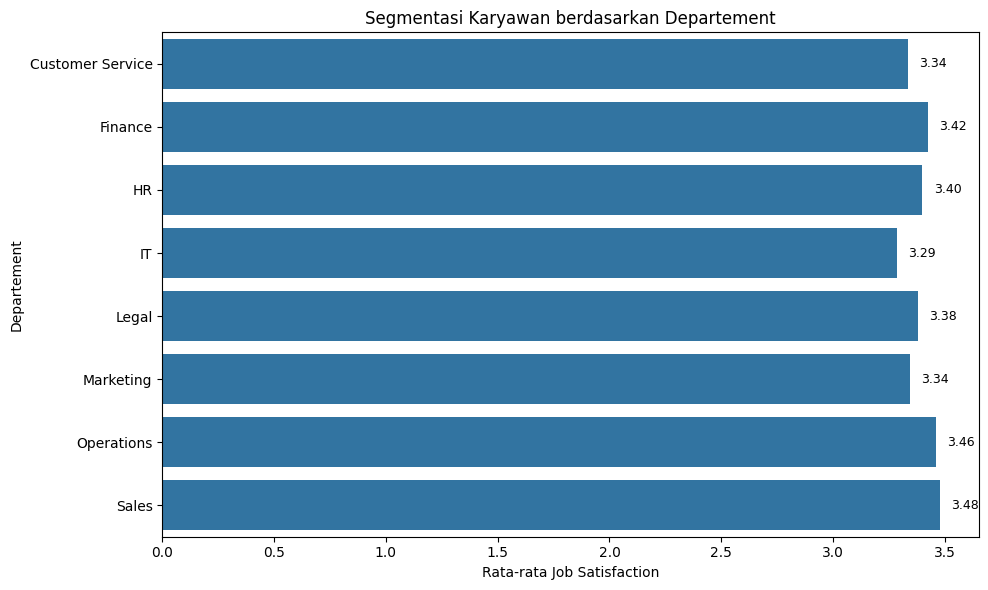

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segmen_karyawan.reset_index(), x='job_satisfaction', y='dept')

for x, y in zip(segmen_karyawan.values, segmen_karyawan.index):
    plt.text(x + 0.05, y, f'{x:.2f}', ha='left', va='center', fontsize=9)

plt.title('Segmentasi Karyawan berdasarkan Departement')
plt.xlabel('Rata-rata Job Satisfaction')
plt.ylabel('Departement')
plt.tight_layout()
plt.show()

Insight :

Berdasarkan visualisasi, tingkat kepuasan kerja karyawan bervariasi di tiap departemen.

- Departemen Sales memiliki rata-rata kepuasan kerja tertinggi yaitu 3.48, disusul oleh Operations (3.46) dan Finance (3.42).

- Departemen IT memiliki rata-rata terendah yaitu 3.29, meskipun perbedaannya relatif kecil dibandingkan departemen lain.

- Departemen seperti HR (3.40), Legal (3.38), dan Marketing (3.34) menunjukkan tingkat kepuasan kerja yang cukup seimbang.

Artinya, Departemen Sales dan Operations kemungkinan memiliki budaya kerja, atau struktur tim yang lebih mendukung kepuasan karyawan. IT sebagai yang terendah bisa dipengaruhi berbagai faktor yaitu adanya tekanan kerja, workload tinggi, atau kurangnya penghargaan atas kontribusi yang diberikan.